# Generate CIFAR-2 (A two class subset of CIFAR-10)


In [ ]:
from utils.config import Project_Config, CIFAR_10_Config
from utils.custom_enums import Dataset_Type_Enum
dataset_type = Dataset_Type_Enum.CIFAR2
project_config = Project_Config()
full_cifar_10_config = CIFAR_10_Config()

from utils.dataset_utils import Dataset_Generator
cifar_2_dataset_generator = Dataset_Generator(project_config=project_config,
                                              dataset_config=full_cifar_10_config,
                                              DATASET_NAME=dataset_type)

/home/joy/miniconda3/envs/SD3HF_Unstable/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/joy/miniconda3/envs/SD3HF_Unstable/lib/python3.10/site-packages/xformers/ops/fmha/flash.py:211: FutureWarning: `torch.library.impl_abstract` was renamed to `torch.library.register_fake`. Please use that instead; we will remove `torch.library.impl_abstract` in a future version of PyTorch.
  @torch.library.impl_abstract("xformers_flash::flash_fwd")
/home/joy/miniconda3/envs/SD3HF_Unstable/lib/python3.10/site-packages/xformers/ops/fmha/flash.py:344: FutureWarning: `torch.library.impl_abstract` was renamed to `torch.library.register_fake`. Please use that instead; we will remove `torch.library.impl_abstract` in a future version of PyTorch.
  @torch.library.impl_abstract("xformers_flash::flash_bwd")


In [2]:
cifar_2_dataset_generator.dataset_config.class_captions

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [ ]:
cifar_2_dataset_generator.generate_base_dataset(
    class_names_to_keep=["automobile","horse"],
    number_items_to_keep_per_class=2500,
)

'Success!'

In [4]:
import datasets
test_ds = datasets.load_dataset(cifar_2_dataset_generator.base_path, split="train")

Generating train split: 5000 examples [00:00, 16787.40 examples/s]


[4202 4427 3845 1902 4835]


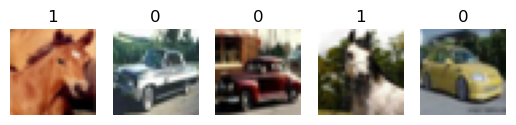

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
rng = np.random.default_rng()

#indicies_to_test = [5,42,4363,18302,360]
indicies_to_test = rng.choice(len(test_ds),5, replace=False)
print(indicies_to_test)
num_to_test = len(indicies_to_test)

for i,image_index in enumerate(indicies_to_test):
    image_index = int(image_index)
    plt.subplot(1, num_to_test, i+1)
    plt.axis('off')
    plt.title(test_ds[image_index]["label"])
    plt.imshow(test_ds[image_index]["image"])